# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


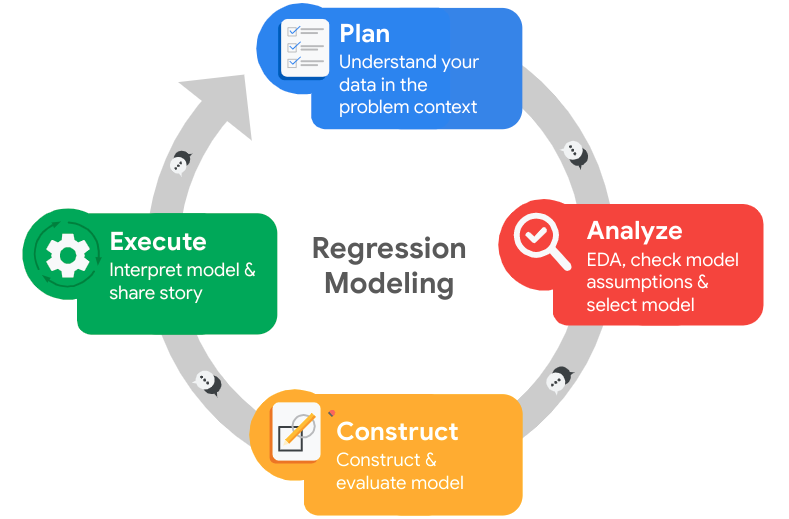

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- My stakeholders for this project includes all employees in Salifort Motors, the HR department, and future prospects working at the company.
- I am trying to build a model that predicts whether an employee would leave the company based on the gathered data.
- I initially observed that there are a few key variables like salary, department, and satisfaction level that could very likely be a great predictor for the predicted variable.
- Introduction on Logistic Regression from course 5 : https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/IxZ9B/introduction-to-logistic-regression
- Module 5 from Course 5, content on Logistic Regression: https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/home/module/5

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [152]:
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data manipulation
import pandas as pd

# Import packages for modelling
import sklearn.metrics as metrics
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Logistic Regression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [153]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [154]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [155]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [156]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [157]:
# Rename columns as needed
### YOUR CODE HERE ###
df = df0.rename(columns={'Work_accident':'work_accident','Department':'department', 'time_spend_company':'tenure','average_montly_hours':'avg_monthly_hours'})

# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [158]:
# Check for missing values
### YOUR CODE HERE ###
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hours        0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [159]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().sum()

3008

In [160]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


My Observations:
- There are 3008 duplicated entries, which is more than 20% of the entire dataset.
- Because there are 10 columns and 8 of them are continuous variables, it is highly unlikely that the entries were duplicated due to chance, thats why I could safely drop the duplicated entries here.

In [161]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

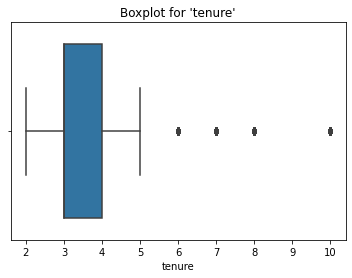

In [162]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x='tenure',data=df1)
plt.title("Boxplot for 'tenure'")
plt.show()

In [163]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
tenure_q1 = df1['tenure'].quantile(.25) 
tenure_q3 = df1['tenure'].quantile(.75)
tenure_iqr = tenure_q3 - tenure_q1
tenure_upper = tenure_q3 + tenure_iqr * 1.5
tenure_lower = tenure_q1 - tenure_iqr * 1.5
tenure_outliers = df[(df['tenure'] < tenure_lower) | (df['tenure'] > tenure_upper)]
print('Outliers in "tenure" column: ',len(tenure_outliers))
print('Upper limit: ',tenure_upper)
print('Lower limit: ', tenure_lower)

Outliers in "tenure" column:  1282
Upper limit:  5.5
Lower limit:  1.5


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?





- Distribution: 76% stayed and 23% left the company


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [164]:

# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print('Left count: ')
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print('Left pct: ')
print(df['left'].value_counts(normalize=True)*100)

Left count: 
0    11428
1     3571
Name: left, dtype: int64
Left pct: 
0    76.191746
1    23.808254
Name: left, dtype: float64


The distribution of employees who left and stayed are 23% and 76% respectively, which is not very balanced. Resampling should be conducted for Regression models, so as to not affect the calculated probability of the outcome. 

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

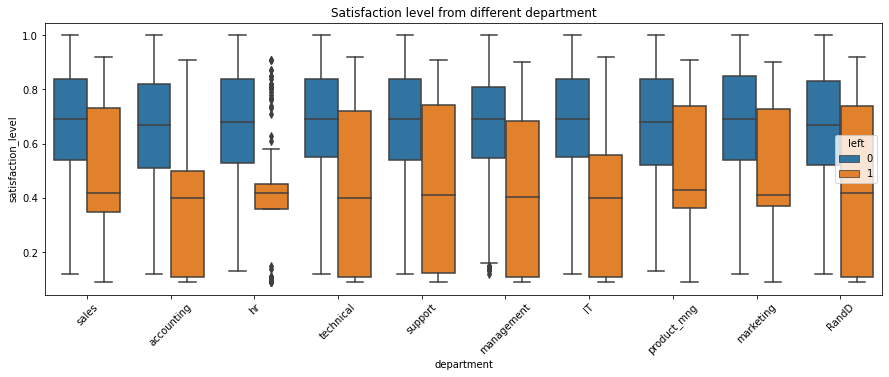

In [165]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,5))
sns.boxplot(data=df1,x='department',y='satisfaction_level',hue='left')
plt.xticks(rotation=45)
plt.title('Satisfaction level from different department')
plt.show()

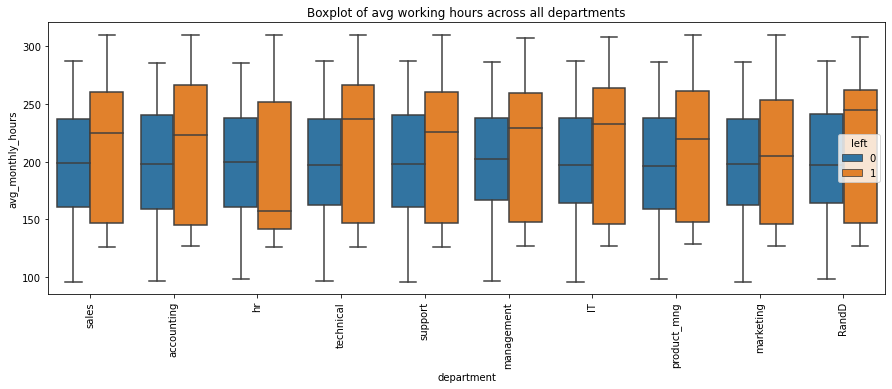

In [166]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df1, x='department',y='avg_monthly_hours',hue='left')
plt.xticks(rotation=90)
plt.title('Boxplot of avg working hours across all departments')
plt.show()

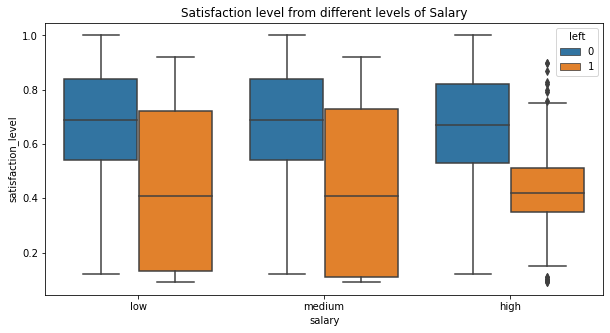

In [167]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,5))
sns.boxplot(data=df1,x='salary',y='satisfaction_level',hue='left')
plt.title('Satisfaction level from different levels of Salary')
plt.show()

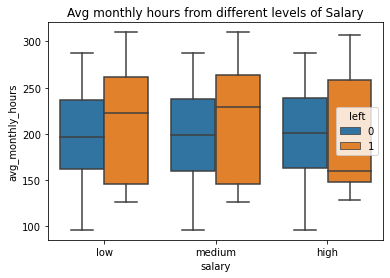

In [168]:
sns.boxplot(data=df1,x='salary',y='avg_monthly_hours',hue='left')
plt.title('Avg monthly hours from different levels of Salary')
plt.show()

The graphs shows that for all employees who left, their working hours varied much more than for those who stayed, meaning they left when their working hours were much higher or much lower than average.

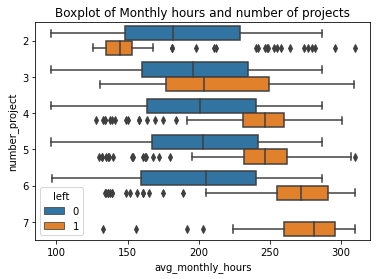

In [169]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df1, x='avg_monthly_hours',y='number_project',hue='left',orient='h')
plt.title('Boxplot of Monthly hours and number of projects')
plt.show()

- It is found that all employees who contributes to 7 projects left the company, and most of them have an average monthly hours of around 280, which is the highest among all groups.
- I also found that most employees that left had worked for much more hours on average than the ones who stayed.
- For the people who left when they are contributing to only 2 projects, they had a much lower monthly hours.

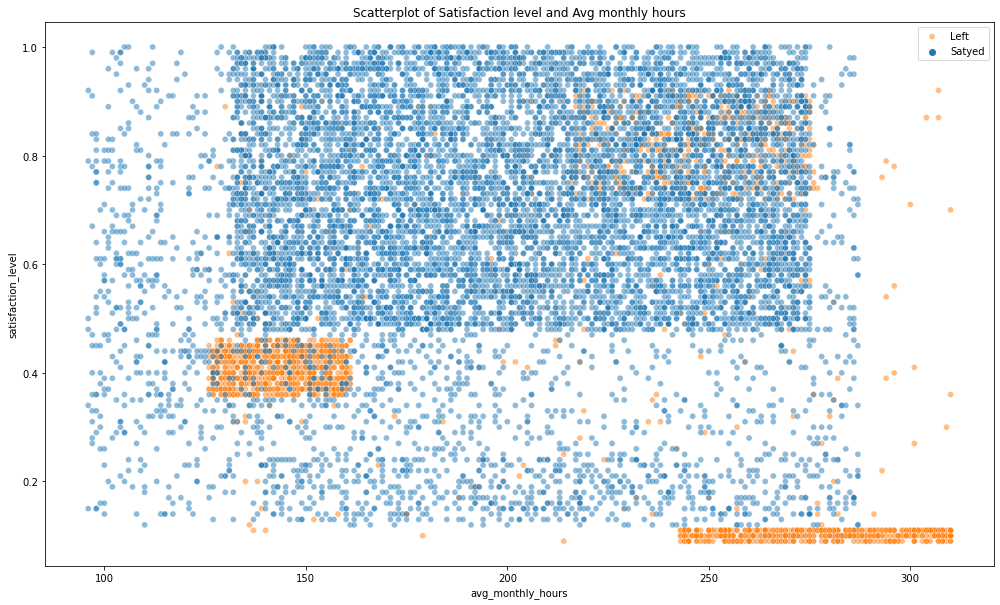

In [170]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(17,10))
sns.scatterplot(data=df1, x='avg_monthly_hours', y='satisfaction_level', hue='left',alpha=.5)
plt.title('Scatterplot of Satisfaction level and Avg monthly hours')
plt.legend(labels=['Left','Satyed'])
plt.show()

- The satisfaction level of employees are quite consistent along all groups of avg monthly hours, however, it is found that a concentrated amount of individuals who worked at >240 avg hours & <160 have left the company.
- Another group of individuals who left the company have both a relatively high satisfaction level and avg monthly hours

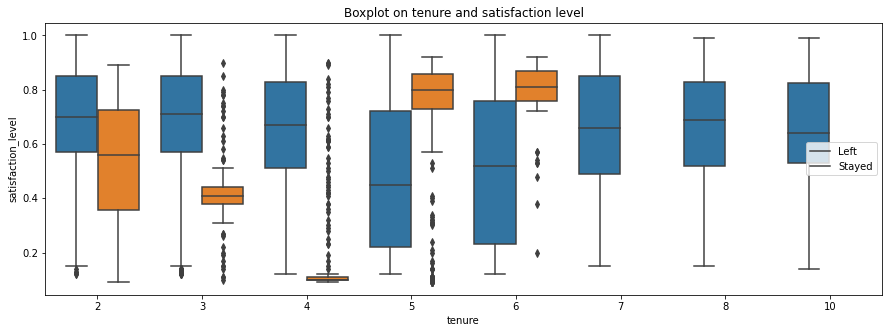

In [171]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,5))
boxplot = sns.boxplot(data=df1, x='tenure',y='satisfaction_level',hue='left',showfliers=True)
boxplot.legend(labels=['Left','Stayed'])
plt.title('Boxplot on tenure and satisfaction level')
plt.show()

This graph shows that most individuals who worked for 5-6 years and left were having a satisfaction level of around 0.8, which is higher than the ones who stayed, this is unusual and should be examined further.

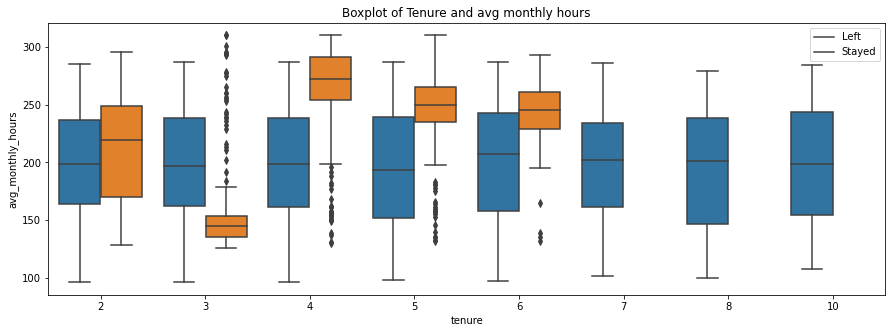

In [172]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,5))
boxplot = sns.boxplot(data=df1,x='tenure',y='avg_monthly_hours',hue='left')
plt.title('Boxplot of Tenure and avg monthly hours')
boxplot.legend(labels=['Left','Stayed'])
plt.show()

- This graph shows that for the people who worked for 4 - 6 years and left, most of them were having working hours of more than 250 monthly.
- And the people who worked for 7 years, they would remain in the company and not leave.

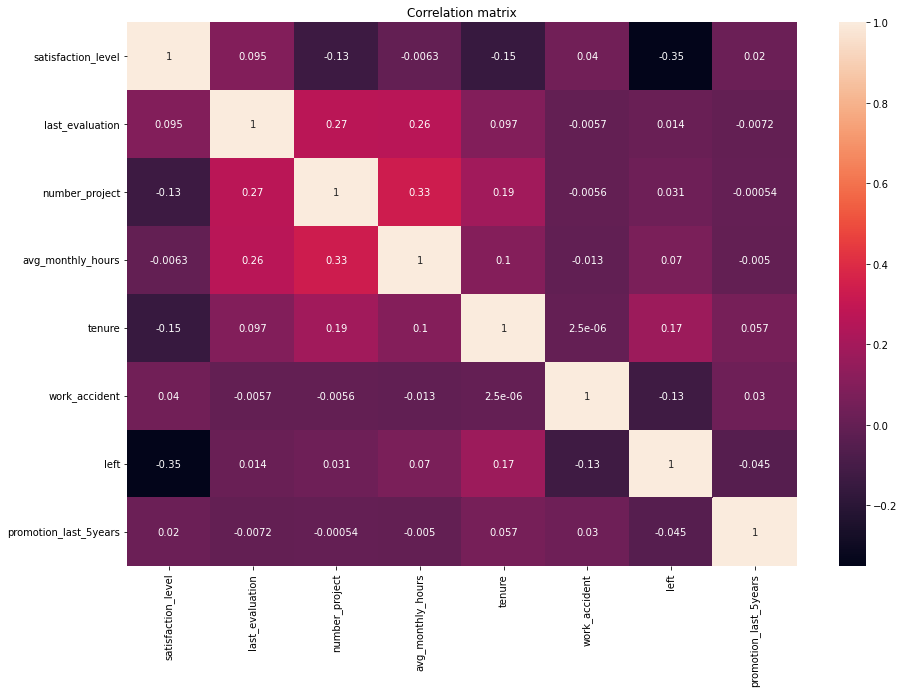

In [173]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

### Insights

- Previous data analysis shows that satisfaction level does have some negative relationship with employees leaving the company.
- It is found that the people who left the company were mostly overworked, and a small portion of people who left were underworked.
- number of projects contributed and the average monthly hours has some positive relationships, and the correlation matrix also shows that the evaluation score of their performance and the amount of hours and projects contributed is positively related.
- People would usually stay in the company after year 7.
- Based on the result from previous analysis, it is shown that the company have a bad management, with results showing a high imbalance in working hours, meaning employees were either underworked or others being overworked which could have led to a high turnover rate.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is to predict a binary outcome using multiple independent variables.

### Identify the types of models most appropriate for this task.

A logistic regression model and Decision tree models are appropriate for this task.

### Modeling

My ethical considerations and reasoning for choosing the evaluation metric: 
The model for HR department to predict ‘left’ variable:
- Precision: The ratio of correctly predicted items out of all predicted items, cost is it ignores the amount of false negative, which is the model predicting the employee as not leaving when it actually is.
- Recall: The ratio of correctly predicted items out of all actual positive values, cost is it ignores the amount of false positives, which is the model predicting an employee is leaving when it is not.
- In this scenario, both precision and recall should be considered and therefore the best score should be the F1 score, which is a harmonic mean of both precision and Recall scores.


In [174]:
# Make a copy of the dataframe and perform data manipulation.
df_modeling = df1.copy()

# Encode 'department' variable with dummies
df_modeling = pd.get_dummies(df_modeling,columns=['department'], drop_first=False)

# Encode 'salary' variable as ordinal numerical array [0,1,2]
df_modeling['salary'] = df_modeling['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df_modeling.head()

# Split data in Training, Validating, and Testing subsets
# Define X and y variable
y = df_modeling['left'].ravel()
X = df_modeling.drop('left',axis=1)

# Split data in Training, Validating, and Testing subsets
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_tr, y_tr, test_size=.25, stratify=y_tr,random_state=42)


In [175]:
# Get shape of each training and testing set
print("X_train: ")
print(X_train.shape)
print("X_validate: ")
print(X_validate.shape)
print("X_test: ")
print(X_test.shape)
print("y_train: ")
print(y_train.shape)
print("y_validate: ")
print(y_validate.shape)
print("y_test: ")
print(y_test.shape)

X_train: 
(6744, 18)
X_validate: 
(2249, 18)
X_test: 
(2998, 18)
y_train: 
(6744,)
y_validate: 
(2249,)
y_test: 
(2998,)


### Decision Tree Model

In [176]:
# Create a dictionary of hyperparameters to tune
tree_param = {'max_depth':[4,6,10,None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split':[2,4,6]}

scoring = {'accuracy', 'precision', 'recall', 'f1','roc_auc'}

decision_tree = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object
dt_cv = GridSearchCV(decision_tree,
                  param_grid=tree_param,
                   scoring=scoring,
                  cv=5,
                  refit='f1')

# Fit model
dt_cv.fit(X_train,y_train)

# Pickle the model for future use
with open('dt_cv.pkl','wb') as write:
    pickle.dump(dt_cv,write)


# Read the saved model with pickle
with open('dt_cv.pkl','rb') as read:
    dt_cv = pickle.load(read)

### Random Forest Model

I used pickle to save the Random Forest model in the rf_cv variable after fitting it with the training dataset:

In [177]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'n_estimators':[50,100,200],
            'max_depth':[3,5,7],
            'min_samples_split':[2,3],
            'min_samples_leaf':[1,2],
            'max_features':[.2,'sqrt'],
            'max_samples':[.6]}

# Define a dictionary of scoring metrics to capture
scoring = {'recall','f1','precision','accuracy','roc_auc'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')


# fit the model
rf_cv.fit(X_train,y_train)

# Pickle the model for future use
with open('rf_cv.pkl','wb') as write:
    pickle.dump(rf_cv,write)


# Read the saved model with pickle
with open('rf_cv.pkl','rb') as read:
    rf_cv = pickle.load(read)

## XGBoost model

I used pickle to save the XGBoost Model in the xgb_cv variable after fitting it with the training dataset:

In [178]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic',random_state=42)

# Create a dictionary of hyperparameters to tune
xgb_cv_params = {'n_estimators':[50,100,200],
                'max_depth':[3,5],
                'min_child_weight':[1,3,5],
                'learning_rate':[0.01,0.1,0.3],
                'colsample_bytree':[.2,.7],
                'subsample':[.2,.7]}

# Define a dictionary of scoring metrics to capture
scoring = {'f1', 'precision', 'recall', 'accuracy','roc_auc'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb,xgb_cv_params,scoring=scoring,cv=5,refit='f1')


# Fit the model
xgb_cv.fit(X_train,y_train)

# Pickle the model for future use
with open('xgb_cv.pkl','wb') as write:
    pickle.dump(xgb_cv,write)


# Read the saved model with pickle
with open('xgb_cv.pkl','rb') as read:
    xgb_cv = pickle.load(read)

### Logistic Regression Model

I used pickle to save the fitted Logistic Regression Model in the clf variable:

In [179]:

# Construct a logistic regression model and fit it to the training set

# Filter outliers from 'tenure' column because logistic regression models are quite sensitive to outliers
outlier_rows = (X_train['tenure'] < tenure_lower) | (X_train['tenure'] > tenure_upper)
X_train = X_train[~outlier_rows]
y_train = y_train[~outlier_rows]


# Define classifier
clf = LogisticRegression(solver='liblinear',random_state=42).fit(X_train,y_train)


# pickle the Logistic regression model
with open('clf.pkl','wb') as write:
    pickle.dump(clf,write)


# Read the saved model with pickle
with open('clf.pkl','rb') as read:
    clf = pickle.load(read)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




## Confusion Matrix

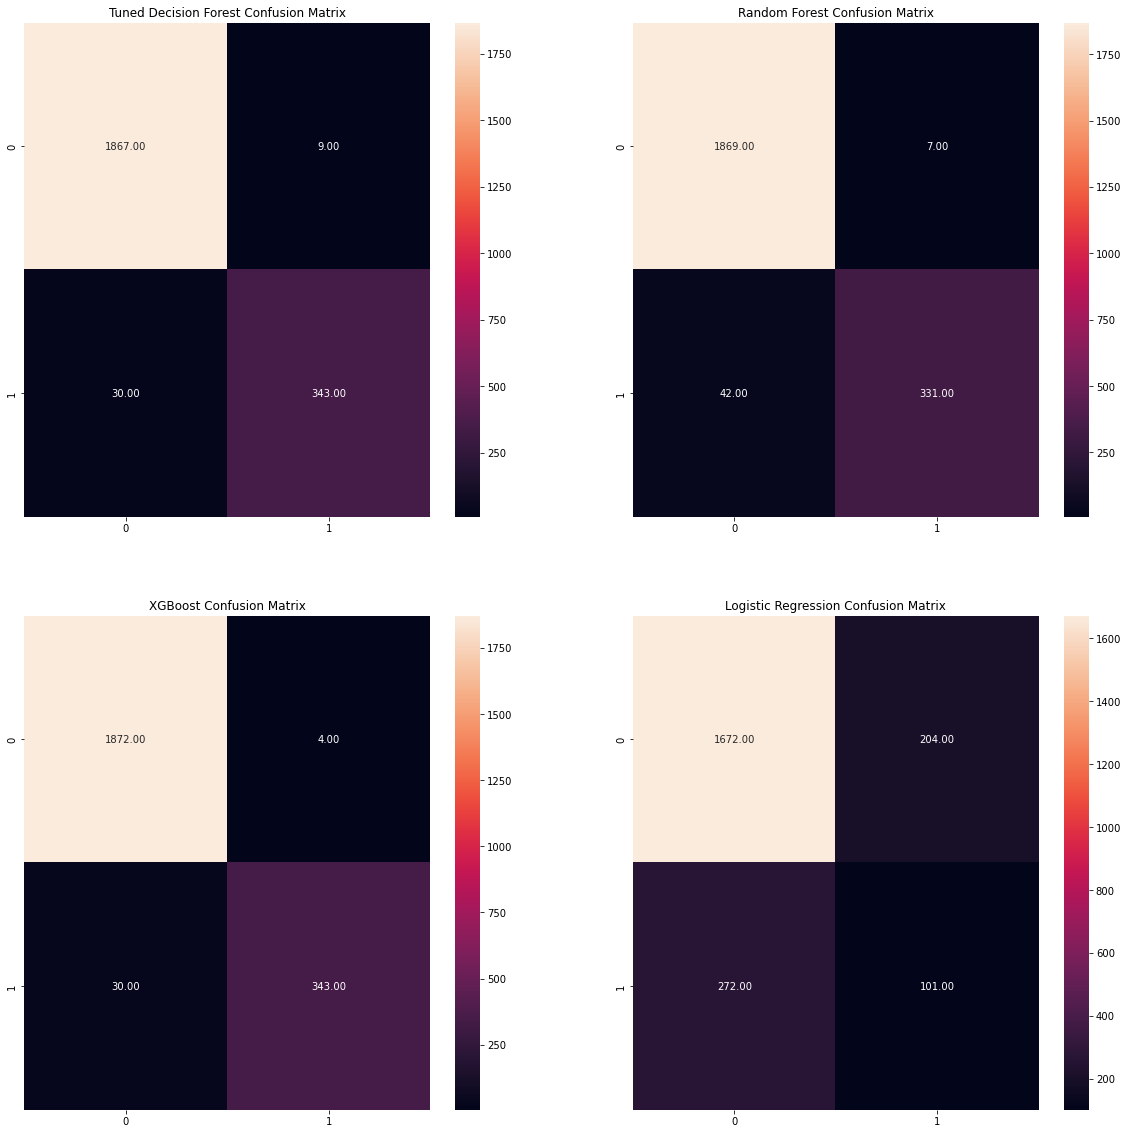

In [180]:
# Create a confusion matrix to visualize the results of the classification models
# Predict results
dt_pred = dt_cv.best_estimator_.predict(X_validate)
rf_pred = rf_cv.best_estimator_.predict(X_validate)
xgb_pred = xgb_cv.best_estimator_.predict(X_validate)
clf_pred = clf.predict(X_validate)

# Compute values for confusion matrix
cm_dt = confusion_matrix(y_validate,dt_pred)
cm_rf = confusion_matrix(y_validate,rf_pred)
cm_xgb = confusion_matrix(y_validate,xgb_pred)
cm_clf = confusion_matrix(y_validate,clf_pred)

# Plot confusion matrix
fig, ax = plt.subplots(2,2, figsize=(20,20))

sns.heatmap(cm_dt, annot=True, fmt='.2f', ax=ax[0, 0])
ax[0, 0].set_title('Tuned Decision Forest Confusion Matrix')

sns.heatmap(cm_rf, annot=True, fmt='.2f', ax=ax[0, 1])
ax[0, 1].set_title('Random Forest Confusion Matrix')

sns.heatmap(cm_xgb, annot=True, fmt='.2f', ax=ax[1, 0])
ax[1, 0].set_title('XGBoost Confusion Matrix')

sns.heatmap(cm_clf, annot=True, fmt='.2f', ax=ax[1,1])
ax[1,1].set_title('Logistic Regression Confusion Matrix')

# Display plot
plt.show()

## Evaluation Metrics

### Decision Tree Splits 

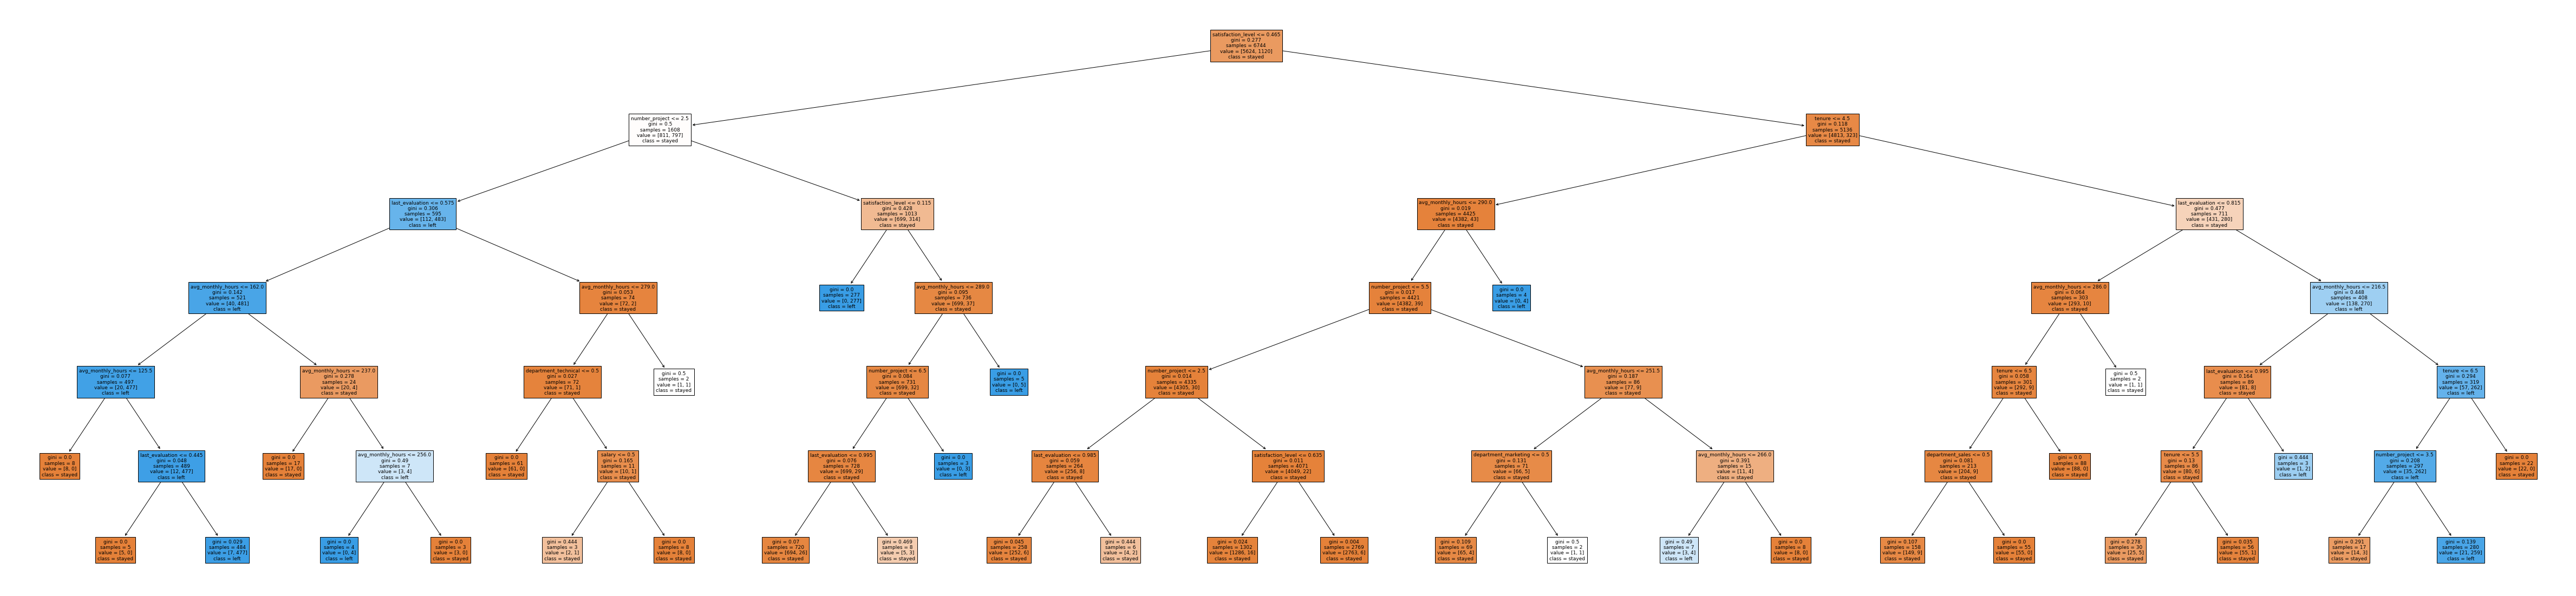

In [181]:
plt.figure(figsize=(85,20))
plot_tree(dt_cv.best_estimator_,
         feature_names=X.columns,
          max_depth=6,
          fontsize=9,
         class_names={0:'stayed',1:'left'},
         filled=True)
plt.show()

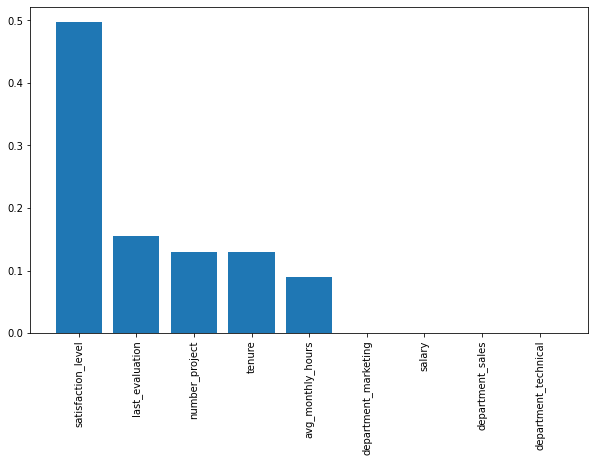

In [187]:
# Get Importance scores of each variable from decision tree 
tree_importances = pd.DataFrame({'feature':X.columns, 'importance':dt_cv.best_estimator_.feature_importances_})
tree_importances = tree_importances.sort_values(by='importance', ascending=False)

# Filter out variables that has zero gini importance in the model
tree_importances = tree_importances[tree_importances['importance'] != 0]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(tree_importances['feature'], tree_importances['importance'])
plt.xticks(rotation=90)
plt.show()


- The Decision tree model accurately predicted the results with an F1 score of 0.93
- Based on the visualization of the decision tree, it suggests that 'satisfaction_level', 'last_evaluation', 'number_project',  and 'tenure' are all important features that has the greatest influence in making decisions within the tree.

In [183]:
# Define a function to create a table to display the best performance of any CV model objects
def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score
    row_best_f1 = results.sort_values(by='rank_test_f1').iloc[0]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    accuracy = row_best_f1['mean_test_accuracy']
    precision = row_best_f1['mean_test_precision']
    recall = row_best_f1['mean_test_recall']
    auc = row_best_f1['mean_test_roc_auc']
    f1 = row_best_f1['mean_test_f1']
    
    # Create table of results
    best_result = pd.DataFrame().append({'model_name':model_name,
                                         'accuracy':accuracy,
                                         'precision':precision,
                                         'recall':recall,
                                         'auc': auc,
                                         'f1':f1},
                                        ignore_index=True)
    return best_result

In [184]:
results = pd.DataFrame(columns=[])
# get scores from Random Forest CV and XGBoost CV and append into results table
results = results.append(make_results('Tuned Decision Tree model',dt_cv))
results = results.append(make_results('Tuned Random Forest',rf_cv))
results = results.append(make_results('Tuned XGBoost model',xgb_cv))

# get scores from Logistic Regression model
clf_accuracy = metrics.accuracy_score(y_validate, clf_pred)
clf_precision = metrics.precision_score(y_validate, clf_pred)
clf_recall = metrics.recall_score(y_validate, clf_pred)
clf_roc_auc = metrics.roc_auc_score(y_validate, clf_pred)
clf_f1 = metrics.f1_score(y_validate, clf_pred)

# Append logistic regression model scores into results table
results = results.append({
    'model_name':'Logistic Regression model',
    'accuracy':clf_accuracy,
    'precision':clf_precision,
    'recall':clf_recall,
    'auc':clf_roc_auc,
    'f1':clf_f1},
    ignore_index=True)

results

,model_name,accuracy,precision,recall,auc,f1
0,Tuned Decision Tree model,0.979983,0.961022,0.916964,0.971640,0.938387
1,Tuned Random Forest,0.975979,0.979157,0.874107,0.980053,0.923494
2,Tuned XGBoost model,0.981168,0.973369,0.911607,0.985647,0.941435
3,Logistic Regression model,0.788350,0.331148,0.270777,0.581018,0.297935


## Final test with the Champion Model (XGBoost)

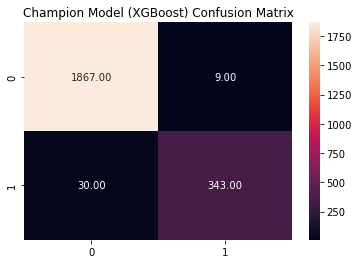

In [185]:
champ_xgb_pred = xgb_cv.best_estimator_.predict(X_test)
champ_cm_xgb = confusion_matrix(y_test,champ_xgb_pred)

sns.heatmap(cm_dt, annot=True, fmt='.2f')
plt.title('Champion Model (XGBoost) Confusion Matrix')
plt.show()

In [186]:
    # Get all the results from the CV and put them in a df
    results = pd.DataFrame(xgb_cv.cv_results_)

    # Isolate the row of the df with the max(mean f1 score
    row_best_f1 = results.sort_values(by='rank_test_f1').iloc[0]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    accuracy = row_best_f1['mean_test_accuracy']
    precision = row_best_f1['mean_test_precision']
    recall = row_best_f1['mean_test_recall']
    auc = row_best_f1['mean_test_roc_auc']
    f1 = row_best_f1['mean_test_f1']
    
    # Create table of results
    best_result = pd.DataFrame().append({'model_name':'Champion Model (XGBoost)',
                                         'accuracy':accuracy,
                                         'precision':precision,
                                         'recall':recall,
                                         'auc': auc,
                                         'f1':f1},
                                        ignore_index=True)
    best_result

,model_name,accuracy,precision,recall,auc,f1
0,Champion Model (XGBoost),0.981168,0.973369,0.911607,0.985647,0.941435


### Summary of model results

- All tree-based models performed very well and outperformed the logistic regression model by a large margin. This could be due to tree-based models are able to detect and model more complex feature interactions that simple linear models may miss.

- Based on the visualization of the decision tree, it suggests that 'satisfaction_level', 'number_project', 'last_evaluation' and 'tenure' are all important features that has the greatest influence in making decisions within the tree. Which could be explained from previous exploratory data analysis

- XGBoost algorithm was selected for the final champion model, which have yielded the best F1 score result in the validation dataset. The model uses a gradient boosting algorithm to predict variables, and were tested to be highly efficient and accurate in predicting classification labels.


### Conclusion, Recommendations, Next Steps

- Based on previous analysis, it is shown that the company have a bad management, with results showing a high imbalance in working hours, meaning employees were either underworked or others being overworked. This could be one of the explanations for why number of projects and hours spent on the company has such an influence on the employee's decision to leave the company.

- HR department should try to put more priority in improving satisfaction level, other department's management level should put in measures to ensure the workload of all workers are reasonable, especially the number of projects one should contribute to. HR should also pay more attention on Evaluation scores of employees as these are all important features that has the greatest influence in making the leave decision. 

- More in depth data could be collected on 'last_evaluation' because it is one of the most influencial feature in the decision tree, for example: what scoring metrics were used for evaluation, how often is it conducted, and whether the reports were accurate. Employees may be lacking grattitude from the company due to unfair or poor evaluations.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.